In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from __future__ import print_function, division # bring the print function and division of Python3 to 2.7

In [2]:
#plt.style.use('seaborn-pastel')

## Monte Carlo simulation
### Hit and Miss (exponential)

On va utilizer le metode de hit and miss pour generer une distribution de données exponential.


In [3]:
def exp_decay(x, A, t, y0):
    return A * np.exp(-x / t) + y0

In [4]:
t = 200.
A = 1/t 
y0 = 0.

xmax = 1200
mc_events = 10000

In [5]:
rnd1 = np.random.rand(mc_events)
rnd2 = np.random.rand(mc_events)
y = A*rnd1
x = xmax*rnd2
yprime = exp_decay(x, A, t, y0)

data = x[np.where(y < yprime)]

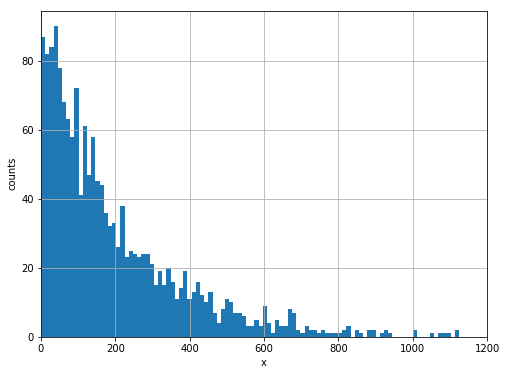

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
ax.hist(data,bins = 100)
ax.set_xlabel("x")
ax.set_ylabel("counts")
ax.set_xlim(0,1200)
plt.show()

### Minimization using the Likelihood method

In [7]:
tmin = 100.
tmax = 300.
L = []

tt = np.arange(tmin, tmax, 1.)

for tau in tt:
    P = exp_decay(data,1/tau,tau,0)
    L.append(np.sum(np.log(P)))
    
tbest = tt[np.where(L == np.max(L))]

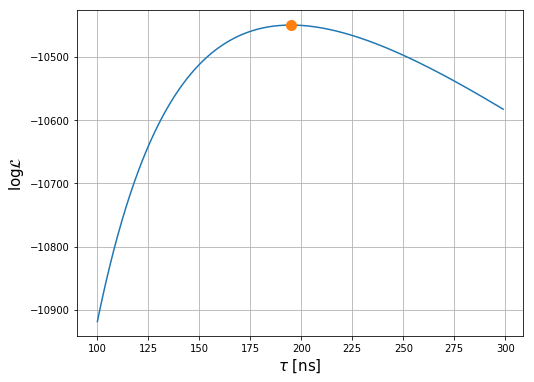

In [8]:
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.grid()
ax1.plot(tt, L)
ax1.set_xlabel(r"$\tau$ [ns]", fontsize=15)
ax1.set_ylabel("$\log \mathcal{L}$", fontsize=15)
ax1.plot(tbest, np.max(L),'o', ms=10)
plt.show()

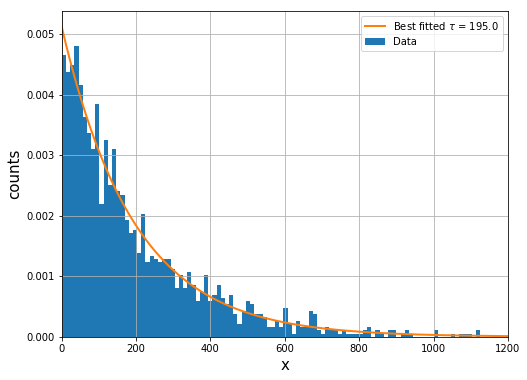

In [9]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
ax2.hist(data,bins = 100,normed=True, label="Data")
x = np.arange(0, xmax, 0.1)

# If the histogram is NOT normalized (normed = False) I need to rescale the PDF by the number of mc event and the binwidth
#  binwidth = np.diff(bins)[0]
#  ax4.plot(x, exp_decay(x, 1/tbest*len(data2)*binwidth, tbest, y0), lw =2 , label=r"Best fitted $\tau$ = %.1f"%tbest)

ax2.plot(x, exp_decay(x, 1/tbest, tbest, y0), lw =2 , label=r"Best fitted $\tau$ = %.1f"%tbest)

ax2.set_xlabel("x", fontsize=15)
ax2.set_ylabel("counts", fontsize=15)
ax2.set_xlim(0,1200)
ax2.legend()
plt.show()

### Minimization using the chi-squared method

Here the approach is a bit different, instead of using the raw data directly, we are going to fit the Histogram, ie we will use the *binned data*, c-a-d the content of each bin and compared with the value of the function for each bincenter. 

In [10]:
hist, binsedges  = np.histogram(data,bins = 100,normed=True)
binscenters = binsedges[:-1] + np.diff(binsedges)/2.


tmin = 100.
tmax = 300.

tmin = 100.
tmax = 300.
Q = []

tt = np.arange(tmin, tmax, 1.)

for tau in tt:
    Q.append(np.sum((hist - exp_decay(binscenters,1/tau, tau, y0))**2)) 
        
tbest = tt[np.where(Q == np.min(Q))]

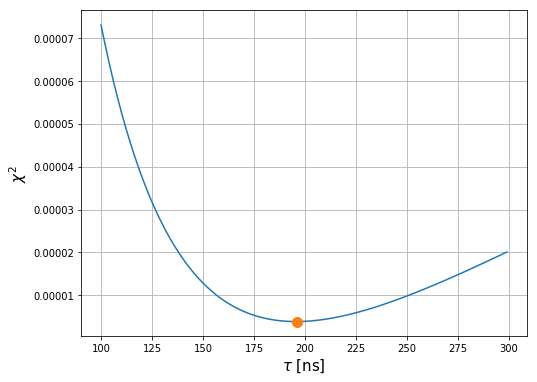

In [11]:
fig3, ax3 = plt.subplots(figsize=(8,6))
plt.grid()
ax3.plot(tt, Q)
ax3.set_xlabel(r"$\tau$ [ns]", fontsize=15)
ax3.set_ylabel("$\chi^2$", fontsize=15)
ax3.plot(tbest, np.min(Q),'o', ms=10)
plt.show()

### Reading a File

This is an example on how to read a text file where each line represents a bin and the value gives us the content of each bin. Ie, we don't have access to the raw data, only the *binned data*. 

In [15]:
file = open("../../Lab data 2016/quartzsignal_his.dat")
nbins = 0
lines = file.readlines()
hist = []
#print lines
for line in lines:
    line = line.replace('\r\n','')
    line = line.replace('\t','')
    try:
        hist.append(int(line.replace('\n', '')))
        nbins += 1
    except Exception as e:
        print (e)
        print (r"Line number: \"%s\" cannot be converted to integer" %(line))
        
file.close()   

invalid literal for int() with base 10: ''
Line number: \"\" cannot be converted to integer


In [16]:
binedges = range(0,nbins+1,1)

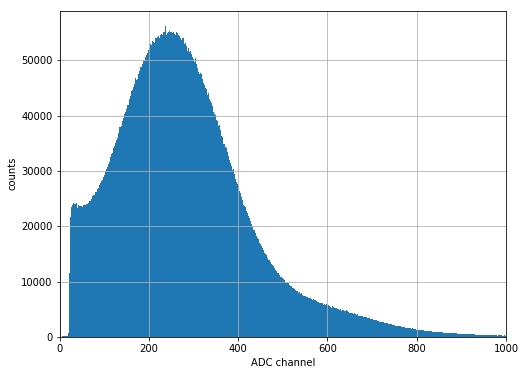

In [17]:
fig4, ax4 = plt.subplots(figsize=(8,6))
plt.grid()
ax4.bar(binedges[:-1],hist,width=np.diff(binedges), align="edge")
ax4.set_xlabel("ADC channel")
ax4.set_ylabel("counts")
ax4.set_xlim(0,1000)
plt.show()